# Taxi Data KMeans Clustering: PULocationID and trip_distance

In [11]:
#Perform kmeans clustering of PULocationIDs and trip_distance
#%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from datetime import datetime
from datetime import date
style.use("ggplot")
sns.set()

In [12]:
#create a training data set and a testing data set
traindf = pd.read_csv("new2_yellow_tripdata_2017-09.csv")
testdf = pd.read_csv("new2_yellow_tripdata_2017-09.csv")

#display first 10 rows of training set
traindf.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-09-01 00:17:17,2017-09-01 00:18:49,1,0.40,1,N,161,161,1,3.5,0.5,0.5,0.00,0.0,0.3,4.80
1,1,2017-09-01 00:22:08,2017-09-01 00:25:22,2,0.90,1,N,164,234,1,5.0,0.5,0.5,1.25,0.0,0.3,7.55
2,2,2017-09-01 00:30:43,2017-09-01 00:33:47,1,0.52,1,N,193,193,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30
3,1,2017-09-01 00:37:57,2017-09-01 00:42:24,1,1.50,1,N,246,50,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30
4,1,2017-09-01 00:15:56,2017-09-01 00:28:28,1,1.30,1,N,143,143,4,9.5,0.5,0.5,0.00,0.0,0.3,10.80
5,1,2017-09-01 00:58:35,2017-09-01 01:07:09,1,1.50,1,N,50,143,1,8.0,0.5,0.5,2.00,0.0,0.3,11.30
6,1,2017-09-01 00:00:13,2017-09-01 00:07:39,1,1.60,1,N,163,186,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30
7,1,2017-09-01 00:32:30,2017-09-01 00:36:03,1,0.70,1,N,163,162,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30
8,1,2017-09-01 00:45:09,2017-09-01 00:51:06,1,0.90,1,N,161,141,1,6.0,0.5,0.5,1.50,0.0,0.3,8.80
9,2,2017-09-01 00:00:30,2017-09-01 00:33:46,1,6.34,1,N,249,188,1,25.0,0.5,0.5,5.26,0.0,0.3,31.56


In [13]:
x_coord_traindf_array = np.array(traindf['PULocationID'])
print("x_coord_testdf_array = ", x_coord_traindf_array)
y_coord_testdf_array = np.array(testdf['trip_distance'])
print("y_coord_testdf_array = ", y_coord_testdf_array)

x_coord_testdf_array =  [161 164 193 ..., 162 255 158]
y_coord_testdf_array =  [ 0.4   0.9   0.52 ...,  1.08  4.58  0.  ]


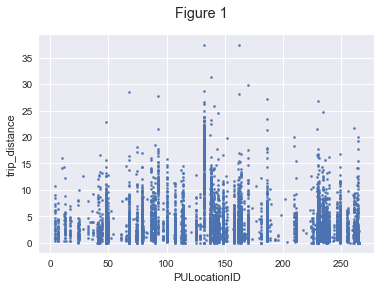

In [14]:
plt.scatter(x_coord_traindf_array, y_coord_testdf_array, s=5)
plt.suptitle('Figure 1')
plt.xlabel('PULocationID')
plt.ylabel('trip_distance')
plt.show()

In [15]:
#Create a 2D array of (PULocationID, trip_distance) points.
#Cluster - unsupervised learning
#XY_array = np.concatenate((x_coord_traindf_array, y_coord_testdf_array))
#display(XY_array)
combined_2D_array = np.vstack((x_coord_traindf_array, y_coord_testdf_array)).T
XY_array = combined_2D_array
display(XY_array)

array([[ 161.  ,    0.4 ],
       [ 164.  ,    0.9 ],
       [ 193.  ,    0.52],
       ..., 
       [ 162.  ,    1.08],
       [ 255.  ,    4.58],
       [ 158.  ,    0.  ]])

centroids:  [[ 240.22120253    3.52943354]
 [  89.69466317    3.17565179]
 [ 157.10061869    3.15865516]
 [  37.05874409    4.2787711 ]]
labels:  [2 0 2 ..., 2 2 2]


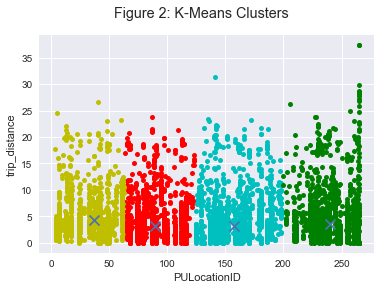

In [27]:
#Flat clustering - perform on 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(XY_array)

#Specify centroids:  cluster based on degrees of variance
centroids = kmeans.cluster_centers_
#Create labels for k-means clustering
labels = kmeans.labels_

print("centroids: ", centroids)
print("labels: ", labels)

colors = ["g.", "r.", "c.", "y."]

for i in range(len(XY_array)):
    #print("coordinate: ", XY_array[i], "label: ", labels[i])
    #loop through XY_array by first index (array 1) and each item of the pair within array 1.    
    plt.plot(XY_array[i][0], XY_array[i][1], colors[labels[i]], markersize=10)

#access first and second elements within inner array
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=5, zorder=10)
plt.suptitle('Figure 2: K-Means Clusters')
plt.xlabel('PULocationID')
plt.ylabel('trip_distance')
plt.show()

# Taxi Data KMeans Clustering: DOLocationID and trip_distance

In [20]:
x_coord_traindf_array_DO = np.array(traindf['DOLocationID'])
print("x_coord_testdf_array = ", x_coord_traindf_array)
y_coord_testdf_array_DO = np.array(testdf['trip_distance'])
print("y_coord_testdf_array = ", y_coord_testdf_array)

x_coord_testdf_array =  [161 234 193 ..., 137 181 158]
y_coord_testdf_array =  [ 0.4   0.9   0.52 ...,  1.08  4.58  0.  ]


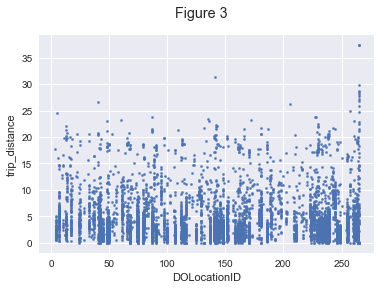

In [21]:
plt.scatter(x_coord_traindf_array_DO, y_coord_testdf_array_DO, s=5)
plt.suptitle('Figure 3')
plt.xlabel('DOLocationID')
plt.ylabel('trip_distance')
plt.show()

In [24]:
#Create a 2D array of (DOLocationID, trip_distance) points.
#Cluster - unsupervised learning
combined_2D_array_DO = np.vstack((x_coord_traindf_array_DO, y_coord_testdf_array_DO)).T
XY_array_DO = combined_2D_array_DO
display(XY_array_DO)

array([[ 161.  ,    0.4 ],
       [ 234.  ,    0.9 ],
       [ 193.  ,    0.52],
       ..., 
       [ 137.  ,    1.08],
       [ 181.  ,    4.58],
       [ 158.  ,    0.  ]])

centroids:  [[ 240.22120253    3.52943354]
 [  89.69466317    3.17565179]
 [ 157.10061869    3.15865516]
 [  37.05874409    4.2787711 ]]
labels:  [2 0 2 ..., 2 2 2]


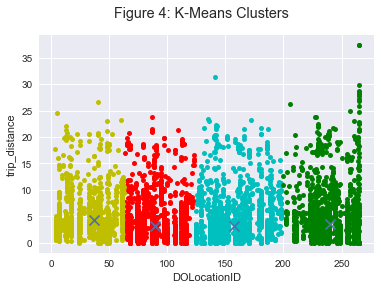

In [26]:
#Cluster w/ kmeans for DOLocationID and trip distance
#Flat clustering - perform on 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(XY_array_DO)

#Specify centroids:  cluster based on degrees of variance
centroids = kmeans.cluster_centers_
#Create labels for k-means clustering
labels = kmeans.labels_

print("centroids: ", centroids)
print("labels: ", labels)

colors = ["g.", "r.", "c.", "y."]

for i in range(len(XY_array_DO)):
    #print("coordinate: ", XY_array_DO[i], "label: ", labels[i])
    #loop through XY_array by first index (array 1) and each item of the pair within array 1.    
    plt.plot(XY_array_DO[i][0], XY_array_DO[i][1], colors[labels[i]], markersize=10)

#access first and second elements within inner array
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=5, zorder=10)
plt.suptitle('Figure 4: K-Means Clusters')
plt.xlabel('DOLocationID')
plt.ylabel('trip_distance')
plt.show()

In [24]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 17 columns):
VendorID                 8 non-null int64
tpep_pickup_datetime     8 non-null object
tpep_dropoff_datetime    8 non-null object
passenger_count          8 non-null int64
trip_distance            8 non-null float64
RatecodeID               8 non-null int64
store_and_fwd_flag       8 non-null object
PULocationID             8 non-null int64
DOLocationID             8 non-null int64
payment_type             8 non-null int64
fare_amount              8 non-null float64
extra                    8 non-null float64
mta_tax                  8 non-null float64
tip_amount               8 non-null float64
tolls_amount             8 non-null int64
improvement_surcharge    8 non-null float64
total_amount             8 non-null float64
dtypes: float64(7), int64(7), object(3)
memory usage: 1.1+ KB
